In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Random Forrest
Random forest is a powerful ensamble method built from one of the simplist ML appraoches out there, the decision tree. 

### Decision Tree
The decision tree is a rule based learning approach. Consider a classification problem: we have three types of shapes circles, triangles, and crosses we wish to classify. These classes have two features, their color (orange, green & blue), and the number of geometric sides of each object (0,3,12).

A decision tree attempts to split the objects into two subgroups based upon each of the features and then picks the split that 'best' separates the classes as its first rule.

<img src="./figures/rf_1.png">

But how do we program the computer to select the 'best' splitting rule? Obviously we need some kind of cost function to minimize! One common cost function is known as Entropy (historically symbolized as 'S') and defined by the relationship:
$$ S = -\sum_{i} p_{i} \cdot log_{2}(p_{i}) $$
where $p_{i}$ describes the fraction of class i in the split. The equation defined above might feel somewhat arbitrary, but I assure you it is not!

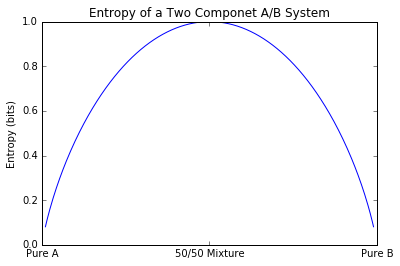

In [18]:
pA=np.linspace(0.01,0.99,300)
plt.plot(pA, -(pA*np.log2(pA)+(1-pA)*np.log2(1-pA)))
plt.title('Entropy of a Two Componet A/B System')
plt.ylabel('Entropy (bits)');
plt.xticks([0,.5,1.0],['Pure A','50/50 Mixture','Pure B']); 
plt.show();

Entropy is a truly fascinating subject (one of my favorites) that is deeply rooted in the most fundamental laws of physics. The mathematical form of S emerges again, and again in the sciences, unexpectedly arising in many profound and beautiful ways. For our purposes, it will be enough to think of entropy as a measure of the 'disorder' in our classification; a perfect classifier will order the objects into the classes where they belong. Our loss function will identify the seperation rule that results in the minumum entropy after the split allowing the decision tree to determine what the best rules are for proper classifcation.

We can calculate the total entropy following the 'Orange Color decision rule' (above, left) as follows:

$$ S_{left, orange} = -[\frac{2}{3}\cdot log_2{\frac{2}{3}} + \frac{1}{3}\cdot log_2{\frac{1}{3}}] = 0.92 \ bits $$

$$ S_{right, orange} = -[\frac{1}{3}\cdot log_2{\frac{1}{3}} + \frac{1}{3}\cdot log_2{\frac{1}{3}} + \frac{1}{3}\cdot log_2{\frac{1}{3}}] = 1.58 \ bits $$

$$ S_{orange} = \frac{3}{6} \cdot S_{left} + \frac{3}{6} \cdot S_{right} = 1.25 \ bits  $$

Similarly the entropy following the 'Green Color' and 'Zero Sided' decision rule (above, center and right) can be calculated as $ S_{green} = 0.81 \ bits $ and  $ S_{zero \ sides} = 0.46 \ bits $ respectively. As the zero sided splitting rule had the lowest entropy (0.46 bits) that will be the first decision rule for our tree!

The left side of our tree is now 'pure' so the next step is to find rule(s) that will best separate the right hand side. Again considering the features color, and number of sides we could explore the following possible splits:

<img src="./figures/rf_2.png">

As you can see splitting the right branch on "Green" or "Three Edges" result in a pure classification tree above. I will leave it up to you to verify those splits do indeed have lower entropy than splitting on orange. 

By following this procedure, we could perfectly fit any training data by allowing the tree to split until all the divisions were pure, but this would invetably lead to overfitting. Decision tree learning can be regularized by a number of hyperparmaters; for example max_depth sets an upper limit on how many splits the tree can make or min_samples_split specifieces how many samples you need to have to make another split. Tuning these paramaters is a critical component of any ML implimentation.

### Bootstrapping Aggregation (Bagging) -- The Random Forest
A ML method that combines many decision trees into an ensamble known as a Random Forrest or RF is currently one of the most commonly used and powerful techniques in the ML toolbox. Random Forrest's are so popular becuase they are far less suspeital to overfitting than the decision trees they are built from. The RF algrothym is simple, but powerful and works like this:
<ol>
<li>Build T Decision Trees that will comprise the forrest.</li>
<li>Randomly select T*N training examples from the dataset, (N samples from each tree) drawn with replacement (a.k.a. Bootstrapping).</li>
<li>Train each tree on a subsample of the P total number of features in the training data (usually $\sqrt{P}$). </li>
<li>Each tree in the forrest gets one vote as to the class idenity, which ever class gets the most votes counts as the RF prediction.</li>
</ol>

Becuase each tree in the Random Forrest saw only a fraction of the total dataset (N samples and $\sqrt{P}$ features), each tree is far less suspetable to overfitting. Though the indivigual trees may have been underfit, the aggreagte RF model on the otherhand has had the benifit of using all the data and all the inputed features, allowing the RF as a whole to best exploit the predictive power of the dataset. This appraoch has proven to be very powerful, scales very well, and is very commonly used.